In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

# A. What is linear regression?
One of the main objectives in both machine learning and data science is finding an equation or distribution that best fits a given dataset. This is known as data modeling, where we create a model that uses the dataset's features as independent variables to predict output values for some dependent variable (with minimal error). However, it is incredibly difficult to find an optimal model for most datasets, given the amount of noise (i.e. random errors/fluctuations) in real world data.

Since finding an optimal model for a dataset is difficult, we instead try to find a good approximating distribution. In many cases, a linear model (a linear combination of the dataset's features) can approximate the data well. The term linear regression refers to using a linear model to represent the relationship between a set of independent variables and a dependent variable.

# &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; y = ax<sub>1</sub> + bx<sub>2</sub> + cx<sub>3</sub> + d

The above formula is example linear model which produces output y (dependent variable) based on the linear combination of independent variables x_1, x_2, x_3. The coefficients a, b, c and intercept d determine the model's fit.

# B. Basic linear regression
The simplest form of linear regression is called least squares regression. This strategy produces a regression model, which is a linear combination of the independent variables, that minimizes the sum of squared residuals between the model's predictions and actual values for the dependent variable.

In scikit-learn, the least squares regression model is implemented with the LinearRegression object, which is a part of the linear_model module in sklearn. The object contains a fit function, which takes in an input dataset of features (independent variables) and an array of labels (dependent variables) for each data observation (rows of the dataset).

The code below demonstrates how to fit a LinearRegression model to a dataset of 5 different pizzas (pizza_data) and corresponding pizza prices. The first column of pizza_data represents the number of calories and the second column represents net weight (in grams).

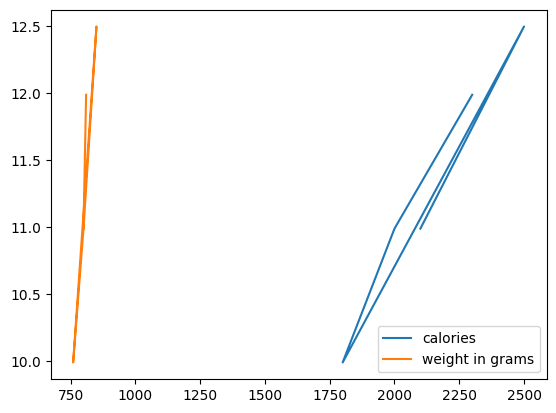

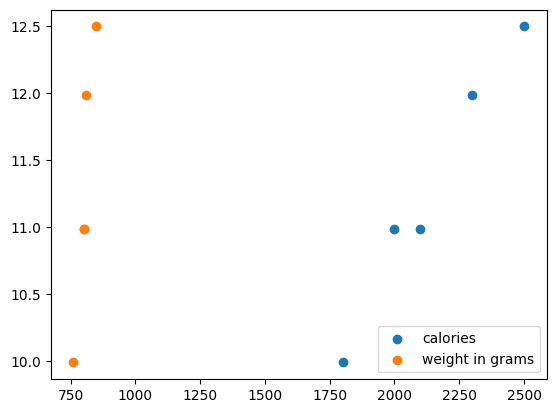

array([[2100,  800],
       [2500,  850],
       [1800,  760],
       [2000,  800],
       [2300,  810]])

array([10.99, 12.5 ,  9.99, 10.99, 11.99])



LinearRegression()

In [2]:
pizza_data = np.array([[2100,  800],
                       [2500,  850],
                       [1800,  760],
                       [2000,  800],
                       [2300,  810]])
pizza_prices = np.array([10.99, 12.5 ,  9.99, 10.99, 11.99])
calorie = pizza_data[:,:1]
gram = pizza_data[:,1:]
plt.plot(calorie,pizza_prices,label="calories")
plt.plot(gram,pizza_prices,label="weight in grams")
plt.legend()
plt.show()

# scatter graph is more suitable for this data
plt.scatter(calorie,pizza_prices,label="calories")
plt.scatter(gram,pizza_prices,label="weight in grams")
plt.legend()
plt.show()
print('{}\n'.format(repr(pizza_data)))
print('{}\n'.format(repr(pizza_prices)))

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(pizza_data, pizza_prices)
# now model is ready to predict data


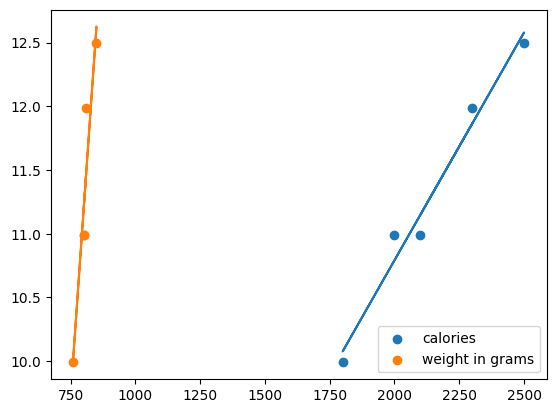

In [10]:
plt.scatter(calorie,pizza_prices,label="calories")
plt.scatter(gram,pizza_prices,label="weight in grams")
plt.legend()

# Reshaping
calorie = calorie.reshape(-1,1)
gram = gram.reshape(-1,1)
pizza_prices = pizza_prices.reshape(-1,1)

# making slope by linear regression
from sklearn.linear_model import LinearRegression
mode1_calorie = LinearRegression().fit(calorie,pizza_prices)
mode1_gram = LinearRegression().fit(gram,pizza_prices)

# get slopes
slope_calorie = mode1_calorie.coef_[0][0]
slope_gram = mode1_gram.coef_[0][0]

# in the below 2 lines our model it drawing the slope after predict the most correct slope coming out by linear regression
plt.plot(calorie, mode1_calorie.predict(calorie),label = 'line of regression between calories and pizza price')
plt.plot(gram, mode1_gram.predict(gram),label = 'line of regression between gram and pizza price')
plt.show()

reshape ki zarurat is liye hai kyunki scikit-learn ke linear regression model ko input ki shape ke specific expectations hote hain. Typically, linear regression models expect input features in a two-dimensional array-like structure where each row represents a sample, and each column represents a feature.

Jab aap fit method use karte hain, to scikit-learn me input features ka shape (n_samples, n_features) hona chahiye. n_samples number of observations (yahan, aapke datapoints) aur n_features number of features (yahan, 1D arrays) ko represent karte hain.

Isliye, reshape ka istemal karke hum apne 1D arrays ko (n_samples, 1) shape mein convert karte hain taaki linear regression model sahi tarah se inhe handle kar sake.

Jab aap LinearRegression().fit(x_feature1, y_array) karte hain, toh internally fit method yeh shape check karta hai aur agar aapne reshape nahi kiya hota, toh model fitting mein error hota.

LinearRegression model ke coef_ attribute ka shape (n_targets, n_features) hota hai, yani ki (number of output targets, number of input features).

Jab aap single feature ka linear regression model train karte hain, to n_features 1 hota hai. Isliye, hum coef_ ka shape (1, 1) hota hai, aur hum [0][0] index se uss ek coefficient ko access karte hain.

Yadi aap multiple features hote, toh coef_ ka shape (1, n_features) hota, aur aap [0] index se saare coefficients ko access kar sakte hain.

Is example mein, kyunki hum ek hi feature use kar rahe hain (x_feature1 ya x_feature2), toh coef_ ka shape (1, 1) hoga, aur hum [0][0] se slope ko extract kar rahe hain.

After calling the fit function, the model is ready to use. The predict function allows us to make predictions on new data.

We can also get the specific coefficients and intercept for the linear combination using the coef_ and intercept_ properties, respectively.

Finally, we can retrieve the coefficient of determination (or R<super>2</super> value) using the score function applied to the dataset and labels. The R<super>2</super> value tells us how close of a fit the linear model is to the data, or in other words, how good of a fit the model is for the data.

In [3]:
# new pizza data
new_pizzas = np.array([[2000,  820],
                       [2200,  830]])

# we have make a new array of two pizzas containing number of calories and grams but not price
# and the price will be predict by our model according to the above given pizza data of previous cell
price_predicts = reg.predict(new_pizzas)
print('{}\n'.format(repr(price_predicts)))

print('Coefficients: {}\n'.format(repr(reg.coef_)))
print('Intercept: {}\n'.format(reg.intercept_))

# basically the equation made by our model is --> 
# pizza_price =  [(first co-efficient)0.00330913 x calories] + [(second co-efficient)0.00232937 x grams] + (intercept)2.337658730158733 

# Using previously defined pizza_data, pizza_prices
r2 = reg.score(pizza_data, pizza_prices) # it gives the accuracy of our model out of 1
print('R2: {}\n'.format(r2))

array([10.86599206, 11.55111111])

Coefficients: array([0.00330913, 0.00232937])

Intercept: 2.337658730158733

R2: 0.9758349388652625



The traditional R2 value is a real number between 0 and 1. In scikit-learn it ranges from -∞ to 1, where lower values denote a poorer model fit to the data. The closer the value is to 1, the better the model's fit on the data. In the example above, we see that the model is a near perfect fit for the pizza data.